# `[11] RNN last`

# Analyzing the sequence of data with RNNs
`-` 중간의 style transfer 부분의 VGG 모델 사용부분은 간단한 실습으로 마무리되어 pre-trained 모델 사용에 대한 자세한 내용을 다른 책에서 언급하겠습니다.

# Intro

**핵심** <br>
concept of RNNs and solve sequential data
<br>

**키워드(keyword)** <br>
LSTM network , long-term, short-term memory , NLP , ... 

# **RNN** (Recurrent Neural Networks)

개발초기 : RNN 은 1980년대에 개발되었고 LSTM 은 1990년대에 개발되었다. 이제 상용화된 것은 인터넷 메모리 저장할 수 있는 능력이 이제 도달했기 때문이다.

`-` NLP (RNN 을 근본으로 사용되는 최근 모델) <br> 
- 사람의 언어를 대표하는 모델이다. 딥러닝에서 아마(perhaps) 가장 오래 탐구된 영역이고 의심할 필요없이 (undoubtedly) RNN을 사용할 때 선호되는 데이터 문제이다.
- NLP train 방식 : 책과 시를 인풋으로 주고 이 때 만들어낼 것의 목적을 함께 주어 새로운 texts 를 만들어 낼 수 있게 한다.
- 챗봇에 사용 , 공식화된 문장을 사용가능하게 함.

## 기본적인 방식

- RNN 은 short-term 방식으로 neural network 의 그림에서 각각의 퍼셉트론에게 바로 `이전의 데이터`를 가중치로 이용하여 계산에 도움을 주는 방식이다.
- 그림을 보자면
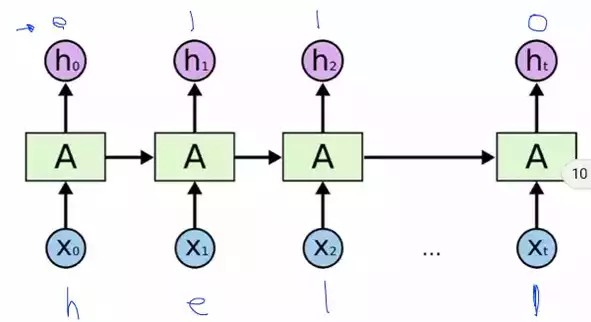

<br>
이 그림에서 말하고자하는 것은 `A -> A` 화살표를 강조하여 가중치가 이전의 가중치가 직접적으로 영향을 간다는 것을 중요시하고 있다.

<br>
- 다음 그림을 보자면
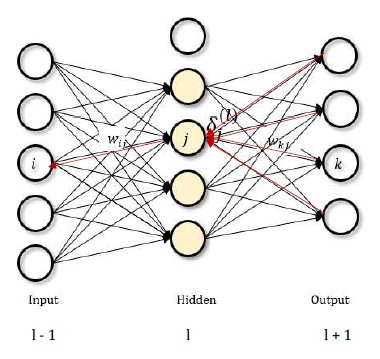

<br>
이 그림에서는 현재의 가중치가 바로 다음의 가중치에도 영향을 주고 이전의 가중치에도 영향을 받았다는 것을 암시하고 있다.

<br>

- 다음 그림을 보자면
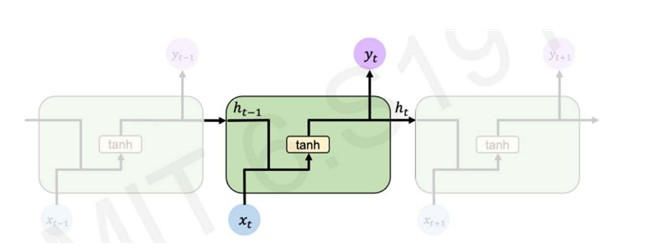
<br>

이 그림은 RNN 의 내부 작동 방식이고 단순하게 tanh 만 사용하여 만든 것처럼 보이고 실제로 그러하다. <br>

**공식**<br>
$$ M_t = tanh(W* [M_(t-1) , E_t ] +b ) $$
<br>
꽤나 가독성이 떨어지게 생긴 식이다. 우리가 평소에 퍼셉트론을 공부했을 때의 공식이 $[M_(t-1) , E_t ] +b$ 이고 가볍게 $M_(t-1) , E_t$ 으로 이루어진 함수 * 가중치 +b (bias) 를 tanh 라는 activation function(비선형함수) 에 넣어서 업데이트하는 방식이라고 보면된다.


그리고 이 방식을 통해 가중치 및 공식이 업데이트되고 가장중요한 것은 `short-term` 으로 진행된다는 것을 깨닫는 것이다.
<br>
`short-term` 은 짧은 기간으로 바로 이전의 가중치만을 업데이트한다는 것으로 `long-term` 이랑 비교를 해보면서 왜 이것이 `short-term` 인지 확인해보자.
<br>
`long-term` 의 대표적인 설명으로 LSTM 모델이 있다. 다음 그림을 보자.
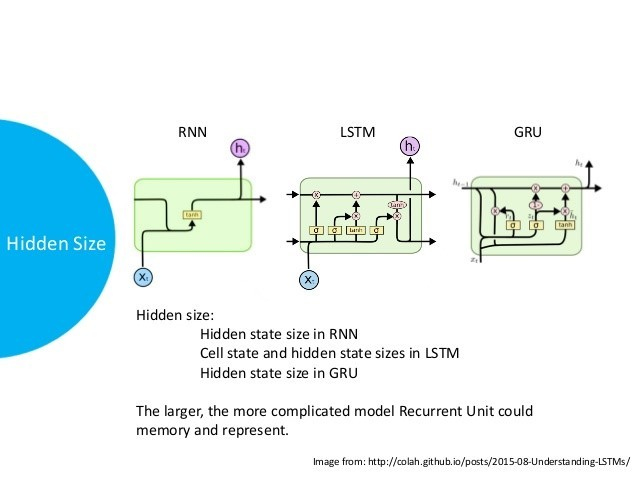
<br>

이 그림은 RNN 과 LSTM 만을 볼 것이다. 가볍게 GRU 도 RNN 에서 나아간 형태 중 하나로 인식하면 된다.
<br>
LSTM 의 형태를 자세히 보는 것도 중요하니 다음 교재인 `텐초의 파이토치`에서 더 자세히 다루어 볼 것이다. LSTM 을 가볍게 보자면

<br>

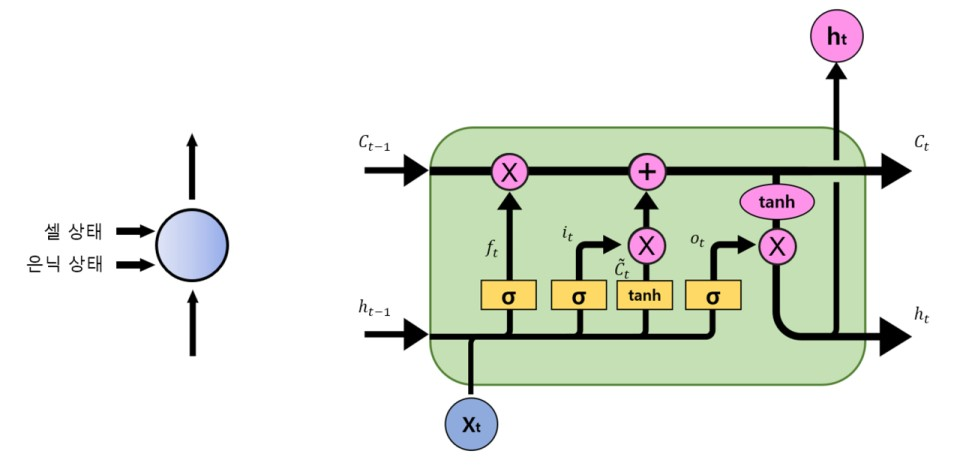

<br>
LSTM 을 보면 C 는 지속적으로 진행되는 `long-term line` 으로 누적되어 계산을 도와주고 h 는 `short-term line` 으로 발보 이전의 가중치를 사용하여 계산하는 방식을 사용한다.

### `-` RNN 의 아웃풋 형태는 매우 다양하다. 
<br>1대1 , 1대 다 , 다대다 형식으로 많이 있으며 그때그때마다 다 쓸 수 있다고 알아두면 편하다.
<br>

예를 들어
- 1대1(One-to-One) 모델은 감정분석 (글을 보고 긍정적인지 부정적인지 판단하는 모델) 
- 1대다(One-to-Many) 모델은 그림을 보고 어떤 문장을 생성한다 
- 다대다(Many-to-Many) 형식은 많은 챗봇처럼 긴 글을 보고 긴 글로 답하는 형식에서 사용된다.

<br>


# RNN 실행 예시

# Import

## Creating the input and target variables for a sequenced data problem

In [2]:
import pandas as pd
import numpy as np
import torch

### $10 *5$ size DataFrame

In [4]:
np.random.seed(0)
data = pd.DataFrame(np.random.randint(0,100,size=(10,5)), #0~100 랜덤.
                    columns = ['Week1','Week2','Week3','Week4','Week5'])
data

,Week1,Week2,Week3,Week4,Week5
0,44,47,64,67,67
1,9,83,21,36,87
2,70,88,88,12,58
3,65,39,87,46,88
4,81,37,25,77,72
5,9,20,80,69,79
6,47,64,82,99,88
7,49,29,19,19,14
8,39,32,65,9,57
9,32,31,74,23,35


In [7]:
inputs = data.iloc[:,:-1]
inputs

,Week1,Week2,Week3,Week4
0,44,47,64,67
1,9,83,21,36
2,70,88,88,12
3,65,39,87,46
4,81,37,25,77
5,9,20,80,69
6,47,64,82,99
7,49,29,19,19
8,39,32,65,9
9,32,31,74,23


In [22]:
data.iloc[:,-1:]

,Week5
0,67
1,87
2,58
3,88
4,72
5,79
6,88
7,14
8,57
9,35


In [23]:
data

,Week1,Week2,Week3,Week4,Week5
0,44,47,64,67,67
1,9,83,21,36,87
2,70,88,88,12,58
3,65,39,87,46,88
4,81,37,25,77,72
5,9,20,80,69,79
6,47,64,82,99,88
7,49,29,19,19,14
8,39,32,65,9,57
9,32,31,74,23,35


In [29]:
import torch.nn as nn

In [30]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size,hidden_size, num_layers, batch_first =True)
        # batch_first는 batch axis을 첫 번째 차원에 놓을지 
        #마지막 차원에 놓을지를 나타내는 옵션
        self.output = nn.Linear(hidden_size,1)
    def forward(self,x,hidden):
        out , hidden =self.rnn(x,hidden)
        out = out.view(-1,self.hidden_size)
        out = self.output(out)
        return out,hidden

`-` 학습 진행 방식 

```python
for i in range(1,epochs+1):

    hidden = None

for inputs , targets in batches:
    pred,hidden = model(inputs, hidden)

    loss =loss_function(pred,targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

`-` 해석
- hidden 을 None 으로 시작점을 맞춰주어야한다. (당연히 첫 시작 epoch 가 편향 가지면 안되니!!)
- for `loop` 는 각각의 batch 마다의 학습을 나타낸다.

# RNN 실습
`-` time series prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
torch.manual_seed(0)

In [2]:
data = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")
data = data.iloc[:,1:53]
data.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


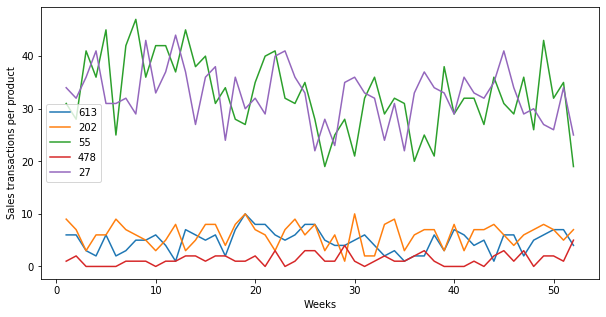

In [3]:
plot_data = data.sample(5, random_state=0)
x = range(1,53)

plt.figure(figsize=(10,5))

for i,row in plot_data.iterrows():
    plt.plot(x,row)

plt.legend(plot_data.index)
plt.xlabel("Weeks")
plt.ylabel("Sales transactions per product")
plt.show()

In [4]:
data_train = data.iloc[:,:-1]
inputs = torch.Tensor(data_train.values).unsqueeze(1)
targets = data_train.shift(-1, axis="columns", fill_value=data.iloc[:,-1]).astype(dtype = "float32") #fill_values 의 scalar 문제 발생?
targets = torch.Tensor(targets.values)

In [5]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.output = nn.Linear(hidden_size, 1)
        
    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = out.view(-1, self.hidden_size)
        out = self.output(out)
        
        return out, hidden

In [6]:
model = RNN(data_train.shape[1], 10, 1)
model

RNN(
  (rnn): RNN(51, 10, batch_first=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)

In [7]:
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10000

In [8]:
losses = []
for i in range(1, epochs+1):
    
    hidden = None
    pred, hidden = model(inputs, hidden)
    target = targets[:,-1].unsqueeze(1)
    
    loss = loss_function(pred, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if i%1000 == 0:
        print("epoch: ", i, "... Loss function: ", losses[-1])

epoch:  1000 ... Loss function:  58.48879623413086
epoch:  2000 ... Loss function:  24.934917449951172
epoch:  3000 ... Loss function:  13.247632026672363
epoch:  4000 ... Loss function:  9.884735107421875
epoch:  5000 ... Loss function:  8.778228759765625
epoch:  6000 ... Loss function:  8.025042533874512
epoch:  7000 ... Loss function:  7.622503757476807
epoch:  8000 ... Loss function:  7.4796295166015625
epoch:  9000 ... Loss function:  7.351718902587891
epoch:  10000 ... Loss function:  7.311776161193848


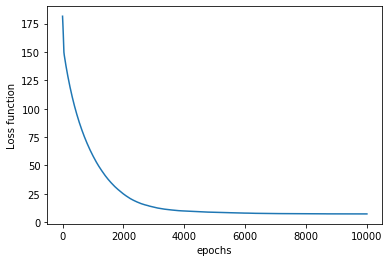

In [9]:
x_range = range(len(losses))
plt.plot(x_range, losses)
plt.xlabel("epochs")
plt.ylabel("Loss function")
plt.show()

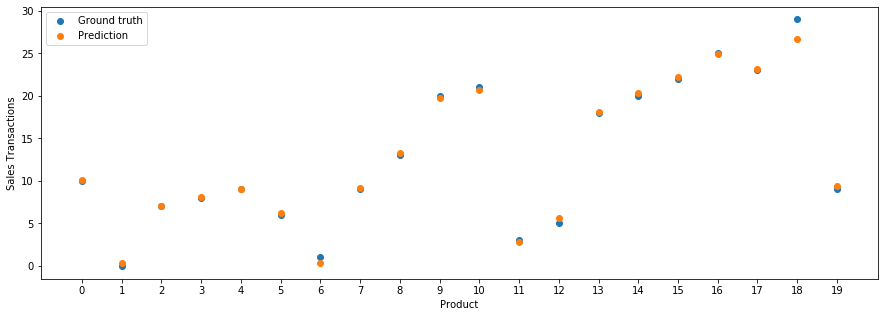

In [10]:
x_range = range(len(data))
target = data.iloc[:,-1].values.reshape(len(data),1)
plt.figure(figsize=(15,5))
plt.scatter(x_range[:20], target[:20])
plt.scatter(x_range[:20], pred.detach().numpy()[:20])
plt.legend(["Ground truth", "Prediction"])
plt.xlabel("Product")
plt.ylabel("Sales Transactions")
plt.xticks(range(0, 20))
plt.show()